In [84]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
FILE_PATHS = [r'cleaned_dataset\df_2020_clean.csv', r'cleaned_dataset\df_2021_clean.csv']

In [85]:
df_2020 = pd.read_csv(FILE_PATHS[0], parse_dates=['donation_date'])
df_2021 = pd.read_csv(FILE_PATHS[1], parse_dates=['donation_date'])

In [86]:
df_2020.dtypes
# Need to apply pd.to_datetime on donation_date

donation_id                       int64
account_id                        int64
shopping_card_id                  int64
campaign_id                       int64
donation_amount                 float64
donation_date            datetime64[ns]
account_type                     object
full_name_(f)                    object
company_name                     object
city                             object
address_line_1                   object
state_or_province                object
zip_code                         object
campaign_name                    object
purpose                          object
fund                             object
tender_type                      object
tribute_full_name_(f)            object
dtype: object

In [87]:
df_2021.dtypes

donation_id                       int64
account_id                        int64
shopping_card_id                  int64
campaign_id                       int64
donation_amount                 float64
donation_date            datetime64[ns]
account_type                     object
full_name_(f)                    object
company_name                     object
city                             object
address_line_1                   object
state_or_province                object
zip_code                         object
campaign_name                    object
purpose                          object
fund                             object
tender_type                      object
tribute_full_name_(f)            object
dtype: object

In [88]:
Counter(df_2020['donation_date'].dt.year)
# The 2020 dataset has records from 2021, 2022, 2024, most of which is from 2020

Counter({2020: 376, 2022: 12, 2021: 5, 2024: 15})

In [89]:
Counter(df_2021['donation_date'].dt.year)
# The 2021 dataset has records from 2021, 2022, 2024, most of which is NOT 2021!

Counter({2021: 366, 2022: 60, 2023: 24, 2024: 11})

In [90]:
def plot_donation_date(path, year_start = 0, year_end = 9999):
    df = pd.read_csv(path, parse_dates=['donation_date'])
    daily_donations = df[(df['donation_date'].dt.year >= year_start) & (df['donation_date'].dt.year <= year_end)].groupby('donation_date', as_index=False).agg(donation_amount=('donation_amount', 'sum'))

    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.plot(daily_donations['donation_date'], daily_donations['donation_amount'], marker='o')

    # Customize the graph
    plt.title('Daily Total Donations Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Donations')

    # Step 4: Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

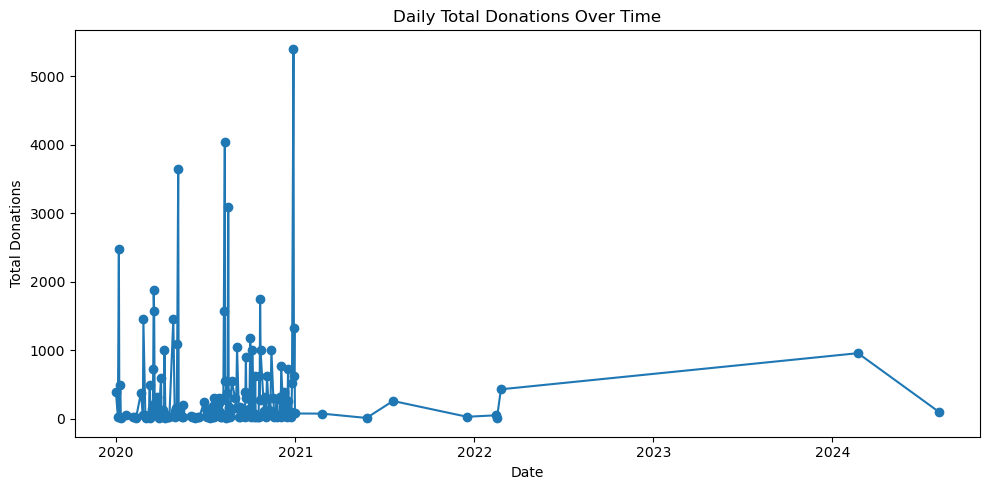

In [91]:
plot_donation_date(FILE_PATHS[0])

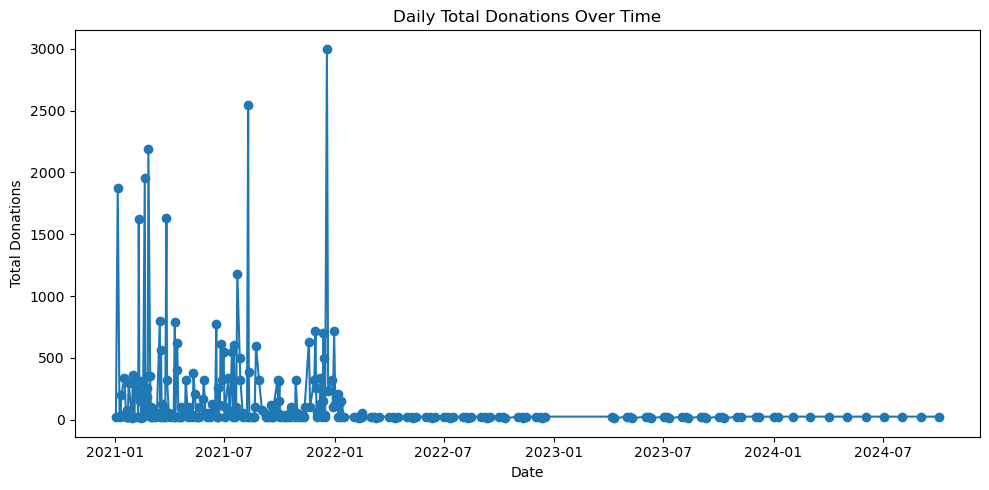

In [92]:
plot_donation_date(FILE_PATHS[1])

# Try plotting in a smaller timeframe

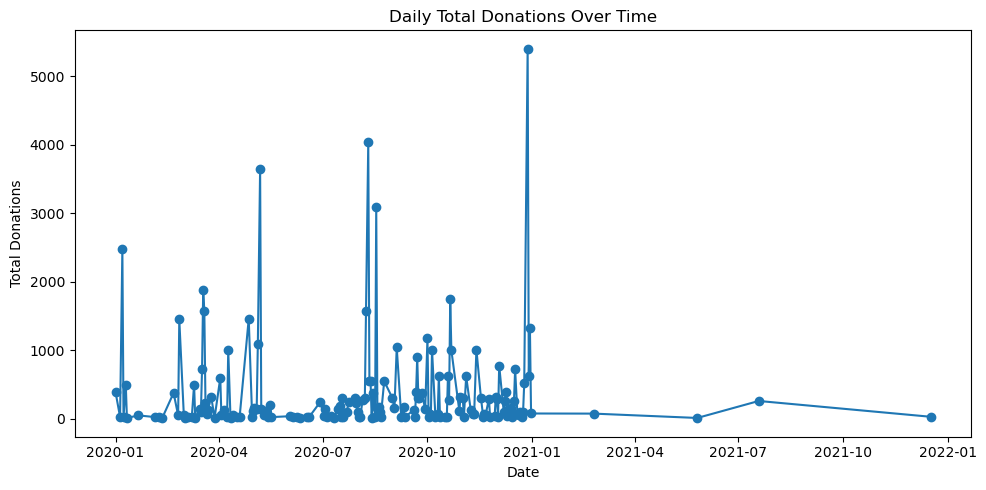

In [93]:
plot_donation_date(FILE_PATHS[0], 2020, 2021)

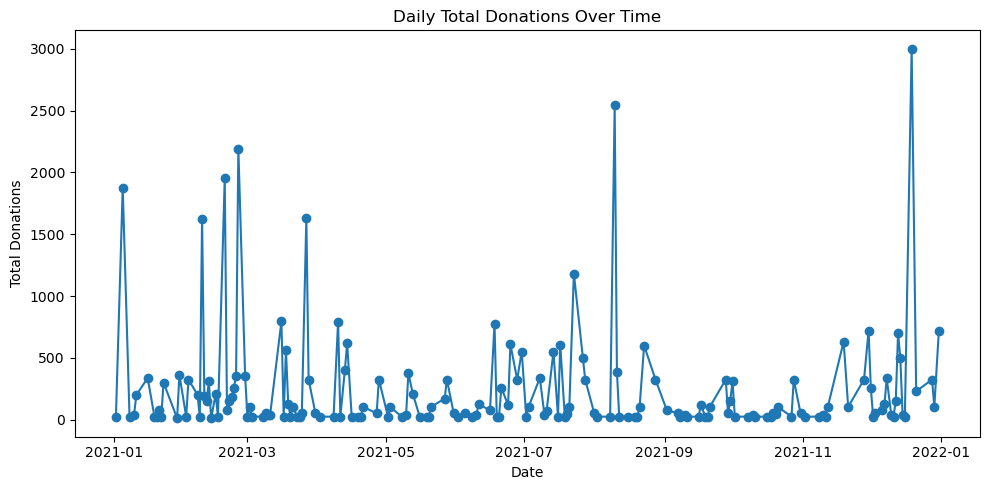

In [94]:
plot_donation_date(FILE_PATHS[1], 2020, 2021)